In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_etfs(100)], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
SPLV,50,1.548317,1.044365,1.312504,1.971361
FINX,50,1.960451,2.488300,0.716500,5.312173
XLU,50,0.911966,1.657786,0.442990,3.426052
ICLN,50,1.151368,2.491970,0.390769,4.109590
VIG,50,1.073390,2.435531,0.367808,4.634193
ITA,50,1.120183,3.185647,0.295889,6.911841
VOOG,50,1.059857,3.067848,0.287587,6.391444
SPYG,50,1.050247,3.044903,0.286598,6.359873
XLF,50,1.150879,4.205305,0.231445,7.338794


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['SPLV', 'FINX'] 0.9074263257932116 1.115547171662521 1.8208834475592637 -2.029004293428573
['SPLV', 'XLU'] 0.8809667444732125 1.28710784225171 1.3493532367252379 -1.7554943345037353
['SPLV', 'ICLN'] 0.38386234167794075 0.5668978164253056 1.5202375592902166 -1.7032730340375815
['XLU', 'ICLN'] 0.2215821635679418 -0.8285692706035004 1.8839105175532063 -0.8337590833817641


['XLU', 'ICLN']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['SPLV'])

['SPLV', 'FINX'] 0.9074263257932116 1.115547171662521 1.8208834475592637 -2.029004293428573
['SPLV', 'XLU'] 0.8809667444732125 1.28710784225171 1.3493532367252379 -1.7554943345037353
['SPLV', 'ICLN'] 0.38386234167794075 0.5668978164253056 1.5202375592902166 -1.7032730340375815


['SPLV', 'ICLN']

In [5]:
quote.setup_mask(['SPLV', 'ICLN'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 SPLV    0.938392
 ICLN    0.061608
 dtype: float64, 1.5239, 1.0341)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
SPLV,50.0,1.548317,1.044365,-0.950248,0.889543,1.733538,2.087735,4.605752,1.312504,1.971361
Portfolio,50.0,1.523427,1.033255,-0.963897,0.898490,1.692032,1.990542,4.394984,1.302528,1.947916
ICLN,50.0,1.151368,2.491970,-2.859960,-1.020986,1.156973,2.745302,6.210528,0.390769,4.109590


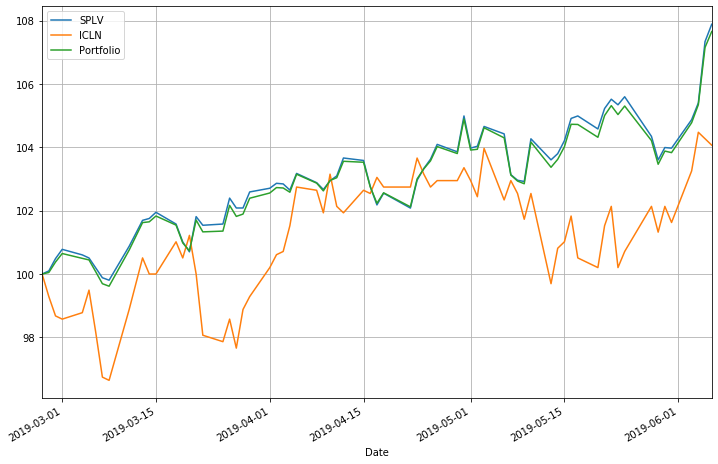

In [6]:
quote.graph(21, {'SPLV': .94, 'ICLN': .06})